## Basin Subsidence (Geohistory Analysis)
The method developed here is taken from the book:
C.Angevine C., P. Heller and C. Paola (1990): "Quantitative Sedimentary Basin Modelling" AAPG

##### Load data from an excel file with the format and headings as

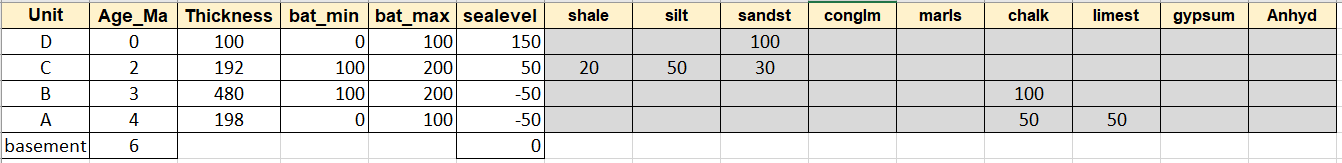
bat_min, bat_max: min and max Bathymetry.

Rock composition values are relative to the total thickness of each Unit.

##### Load rock properties from an excel file with the format and headings as
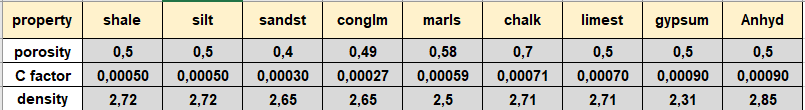


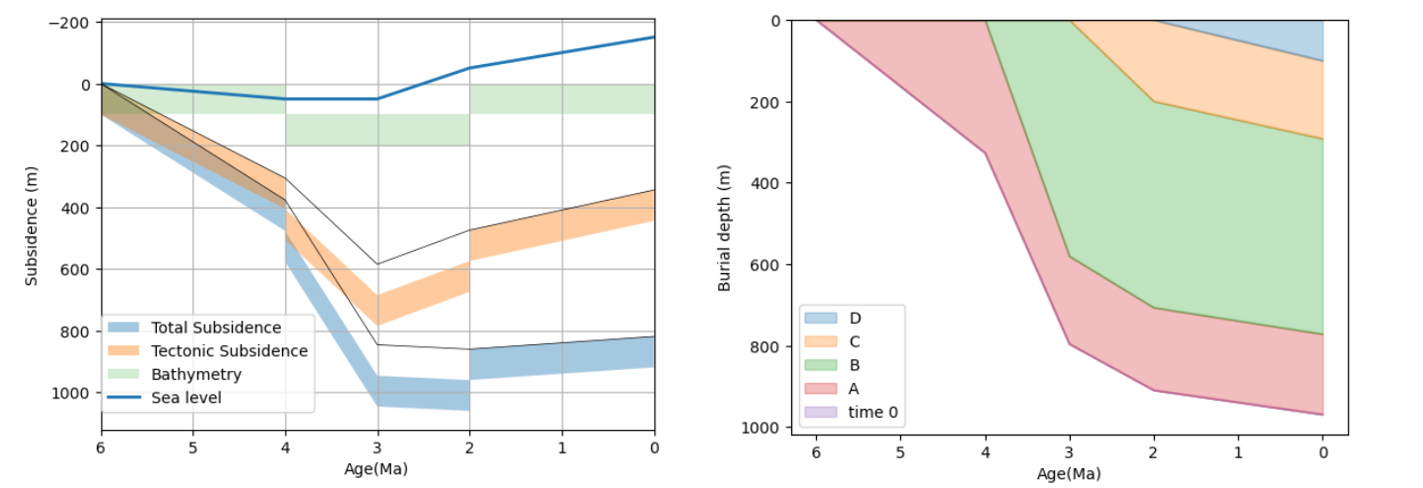

In [1]:
import pandas as pd
#pd.set_option('display.max_rows', 1500)    #set maximum rows of display
pd.set_option('display.max_columns', 50)    #set maximum columns of display
import  matplotlib.pyplot as plt
import ipywidgets as widgets
#from ipywidgets import Button, Layout
style = {'description_width': 'initial'}
import numpy as np
import io
import pandas as pd
import panel as pn

#initial parameters
d_crust = 2850  #kg/m3
d_mantle = 3300  # lithospheric mantle density at 0ºC
d_ast = 3250
d_water = 1000
d_air = 0

In [2]:
pn.extension()
def load_excel(data):
    if data is not None:
        global df
        df = pd.read_excel(io.BytesIO(data))
        return df
file_input1 = pn.widgets.FileInput(accept=".xlsx")
active_load_excel1 = pn.bind(load_excel, file_input1.param.value)

file_input2 = pn.widgets.FileInput(accept=".xlsx")
active_load_excel2 = pn.bind(load_excel, file_input2.param.value)

card1 = pn.Card(file_input1, title='Data File', width=600)
card2 = pn.Card(file_input2, title='rock properties', width=600)
pn.Column(card1,card2)

Column
    [0] Card(title='Data File', width=600)
        [0] FileInput(accept='.xlsx')
    [1] Card(title='rock properties', width=600)
        [0] FileInput(accept='.xlsx')

In [3]:
rock_prop = active_load_excel2()
rock_prop = rock_prop.set_index('property')
rock_prop

,shale,silt,sandst,conglm,marls,chalk,limest,gypsum,Anhyd
property,,,,,,,,,
porosity,0.5000,0.5000,0.4000,0.49000,0.58000,0.70000,0.5000,0.5000,0.5000
C,0.0005,0.0005,0.0003,0.00027,0.00059,0.00071,0.0007,0.0009,0.0009
density,2.7200,2.7200,2.6500,2.65000,2.50000,2.71000,2.7100,2.3100,2.8500


In [4]:
stratdata = active_load_excel1()
stratdata = stratdata.set_index('Unit')
stratdata = stratdata.fillna(0)
stratdata

,Age_Ma,Thickness,bat_min,bat_max,sealevel,shale,silt,sandst,conglm,marls,chalk,limest,gypsum,Anhyd
Unit,,,,,,,,,,,,,,
Solsona,34.36,563.2,-100.0,0.0,0.0,40.0,50.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
Igualada-Tossa,36.81,1662.8,30.0,150.0,0.0,0.0,0.0,10.0,0.0,70.0,0.0,20.0,0.0,0.0
Folgueroles,40.00,97.5,100.0,150.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0
Banyoles,41.50,218.0,50.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0
Tavertet,43.00,127.0,10.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
Penya,46.26,96.7,10.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
Cadí,49.00,460.5,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
basement,55.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Set Rock Physical Properties

In [5]:
rock_comp = stratdata[['shale','silt', 'sandst', 'conglm', 'marls', 'chalk', 'limest', 'gypsum', 'Anhyd']].T
rock_comp = (rock_comp/rock_comp.sum()).T
rock_comp.drop(rock_comp.index[[-1]])
rock_types = rock_comp.columns

rock_comp[['porosity','grain_density','C-index']] = 0
for n in rock_types:
    rock_comp['porosity'] += rock_comp[n]*rock_prop[n]['porosity']
    rock_comp['grain_density'] += rock_comp[n]*rock_prop[n]['density']
    rock_comp['C-index'] += rock_comp[n]*rock_prop[n]['C']
rock_comp.drop( index = rock_comp.index[len(rock_comp)-1])

,shale,silt,sandst,conglm,marls,chalk,limest,gypsum,Anhyd,porosity,grain_density,C-index
Unit,,,,,,,,,,,,
Solsona,0.4,0.5,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.500,2.719,0.000520
Igualada-Tossa,0.0,0.0,0.1,0.0,0.7,0.0,0.2,0.0,0.0,0.546,2.557,0.000583
Folgueroles,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400,2.650,0.000300
Banyoles,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.580,2.500,0.000590
Tavertet,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.500,2.710,0.000700
Penya,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.500,2.710,0.000700
Cadí,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.500,2.710,0.000700


### Build Subsidence spreadsheet

In [6]:
subside_data = pd.concat((stratdata[['Age_Ma', 'Thickness', 'bat_min', 'bat_max', 'sealevel']],
                          rock_comp[['porosity', 'grain_density', 'C-index']]), axis = 1)

#Calculate porosity of each unit at time 0
subside_data['p0']=''  #porosity at time 0
subside_data = subside_data.reset_index()
subside_data.loc[-1] = 0                     #adding an empty top row
subside_data.index = subside_data.index +1   #reindexing
subside_data = subside_data.sort_index()     # sorting by index

thickness = subside_data['Thickness']
porosity = subside_data['porosity']
Cindex = subside_data['C-index']
depth = 0
for n in np.linspace(1,len(subside_data)-1,len(subside_data)-1):
    depth += thickness[n-1]/2 + thickness[n]/2
    subside_data.loc[n,'p0'] = porosity[n]*np.e**(-Cindex[n]*depth)    # calculate porosity according to mean depth of the unit
    subside_data.loc[n,'thick0'] = subside_data['Thickness'][n]           # copy present day thickness

subside_data = subside_data.drop(index = 0)
subside_data = subside_data.reset_index(drop = True)

subside_data

,Unit,Age_Ma,Thickness,bat_min,bat_max,sealevel,porosity,grain_density,C-index,p0,thick0
0,Solsona,34.36,563.2,-100.0,0.0,0.0,0.500,2.719,0.000520,0.431892,563.2
1,Igualada-Tossa,36.81,1662.8,30.0,150.0,0.0,0.546,2.557,0.000583,0.242152,1662.8
2,Folgueroles,40.00,97.5,100.0,150.0,0.0,0.400,2.650,0.000300,0.202156,97.5
3,Banyoles,41.50,218.0,50.0,100.0,0.0,0.580,2.500,0.000590,0.138083,218.0
4,Tavertet,43.00,127.0,10.0,30.0,0.0,0.500,2.710,0.000700,0.08073,127.0
5,Penya,46.26,96.7,10.0,15.0,0.0,0.500,2.710,0.000700,0.07465,96.7
6,Cadí,49.00,460.5,0.0,30.0,0.0,0.500,2.710,0.000700,0.061424,460.5
7,basement,55.90,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0


### Decompaction
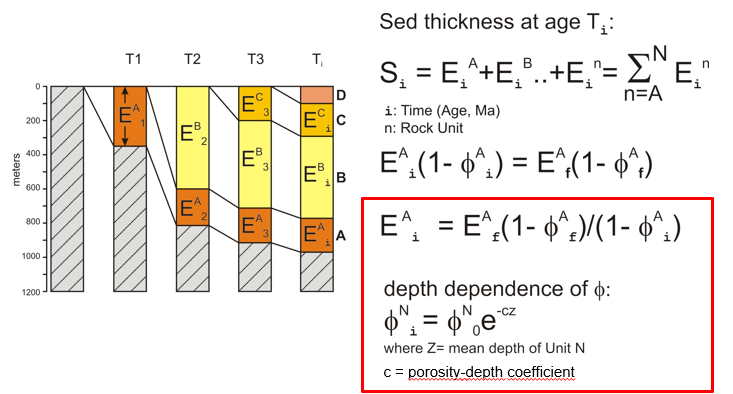

In [7]:
# ADD new columns for decompation data
newcolumns = list(np.linspace(1,len(subside_data)-1,len(subside_data)-1))
newcolumns = list(map(int, newcolumns))

for n in range(len(newcolumns)):
    subside_data['p'+str(newcolumns[n])] = 0
    subside_data['thick'+str(newcolumns[n])] = 0

# Decompaction
for m in np.linspace(1,len(subside_data)-1,len(subside_data)-1):
    m = int(m)
    depth = 0
    for r in np.linspace(m,len(subside_data)-1,len(subside_data)-int(m)):
        #do something
        r = int(r)
        depth += subside_data['thick'+str(m)][r-1]/2 + subside_data['thick'+str(m-1)][r]/2
        subside_data.loc[r, 'p'+str(m)] = subside_data['porosity'][r]*np.e**(-subside_data['C-index'][r]*depth)
        subside_data.loc[r, 'thick'+str(m)] = (subside_data['thick'+str(m-1)][r]*(1-subside_data['p'+str(m-1)][r])/
                                        (1- subside_data['p'+str(m)][r]) )

subside_data

,Unit,Age_Ma,Thickness,bat_min,bat_max,sealevel,porosity,grain_density,C-index,p0,thick0,p1,thick1,p2,thick2,p3,thick3,p4,thick4,p5,thick5,p6,thick6,p7,thick7
0,Solsona,34.36,563.2,-100.0,0.0,0.0,0.500,2.719,0.000520,0.431892,563.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,Igualada-Tossa,36.81,1662.8,30.0,150.0,0.0,0.546,2.557,0.000583,0.242152,1662.8,0.336269,1898.585251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,Folgueroles,40.00,97.5,100.0,150.0,0.0,0.400,2.650,0.000300,0.202156,97.5,0.231049,101.163583,0.393976,128.360912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,Banyoles,41.50,218.0,50.0,100.0,0.0,0.580,2.500,0.000590,0.138083,218.0,0.179380,228.970593,0.506625,380.842459,0.518365,390.125202,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,Tavertet,43.00,127.0,10.0,30.0,0.0,0.500,2.710,0.000700,0.08073,127.0,0.109695,131.131777,0.356005,181.285959,0.358282,181.929202,0.469155,219.927245,0.000000,0.000000,0.000000,0.000000,0.0,0.0
5,Penya,46.26,96.7,10.0,15.0,0.0,0.500,2.710,0.000700,0.07465,96.7,0.101287,99.566099,0.322675,132.109882,0.320989,131.781776,0.414816,152.911402,0.473944,170.098471,0.000000,0.000000,0.0,0.0
6,Cadí,49.00,460.5,0.0,30.0,0.0,0.500,2.710,0.000700,0.061424,460.5,0.083257,471.467632,0.261228,585.044432,0.249764,576.104669,0.321398,636.918590,0.357320,672.519445,0.395135,714.562963,0.0,0.0
7,basement,55.90,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#LOOPING FOR REFINED CALCULATION
doloop = True
prev_last_cell = subside_data['thick'+str(len(subside_data)-2)][int(len(subside_data)-2)]
count = 1
while doloop == True:
    for m in np.linspace(1,len(subside_data)-1,len(subside_data)-1):
        m = int(m)
        depth = 0
        for r in np.linspace(m,len(subside_data)-1,len(subside_data)-int(m)):
            #do something
            r = int(r)
            depth += subside_data['thick'+str(m)][r-1]/2 + subside_data['thick'+str(m)][r]/2
            subside_data.loc[r, 'p'+str(m)] = subside_data['porosity'][r]*np.e**(-subside_data['C-index'][r]*depth)
            subside_data.loc[r, 'thick'+str(m)] = (subside_data['thick'+str(m-1)][r]*(1-subside_data['p'+str(m-1)][r])/
                                            (1- subside_data['p'+str(m)][r]) )
    last_cell = subside_data['thick'+str(len(subside_data)-2)][int(len(subside_data)-2)]
    
    if abs((prev_last_cell-last_cell)/last_cell) < 0.001:
        doloop = False
    else:
        prev_last_cell = last_cell
        count += count

print(count, " loops")

subside_data    

1  loops


,Unit,Age_Ma,Thickness,bat_min,bat_max,sealevel,porosity,grain_density,C-index,p0,thick0,p1,thick1,p2,thick2,p3,thick3,p4,thick4,p5,thick5,p6,thick6,p7,thick7
0,Solsona,34.36,563.2,-100.0,0.0,0.0,0.500,2.719,0.000520,0.431892,563.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,Igualada-Tossa,36.81,1662.8,30.0,150.0,0.0,0.546,2.557,0.000583,0.242152,1662.8,0.318570,1849.271224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,Folgueroles,40.00,97.5,100.0,150.0,0.0,0.400,2.650,0.000300,0.202156,97.5,0.226275,100.539333,0.392392,128.026221,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,Banyoles,41.50,218.0,50.0,100.0,0.0,0.580,2.500,0.000590,0.138083,218.0,0.171747,226.860549,0.483117,363.521495,0.517103,389.105849,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,Tavertet,43.00,127.0,10.0,30.0,0.0,0.500,2.710,0.000700,0.08073,127.0,0.104136,130.318085,0.333365,175.129369,0.357328,181.659262,0.463343,217.545463,0.000000,0.000000,0.000000,0.000000,0.0,0.0
5,Penya,46.26,96.7,10.0,15.0,0.0,0.500,2.710,0.000700,0.07465,96.7,0.096105,98.995251,0.299830,127.799441,0.320218,131.632408,0.407275,150.966014,0.471245,169.230142,0.000000,0.000000,0.0,0.0
6,Cadí,49.00,460.5,0.0,30.0,0.0,0.500,2.710,0.000700,0.061424,460.5,0.078775,469.173673,0.235259,565.177705,0.249946,576.244744,0.310239,626.614704,0.351710,666.699588,0.390161,708.735624,0.0,0.0
7,basement,55.90,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Total and Tectonic  Subsidence

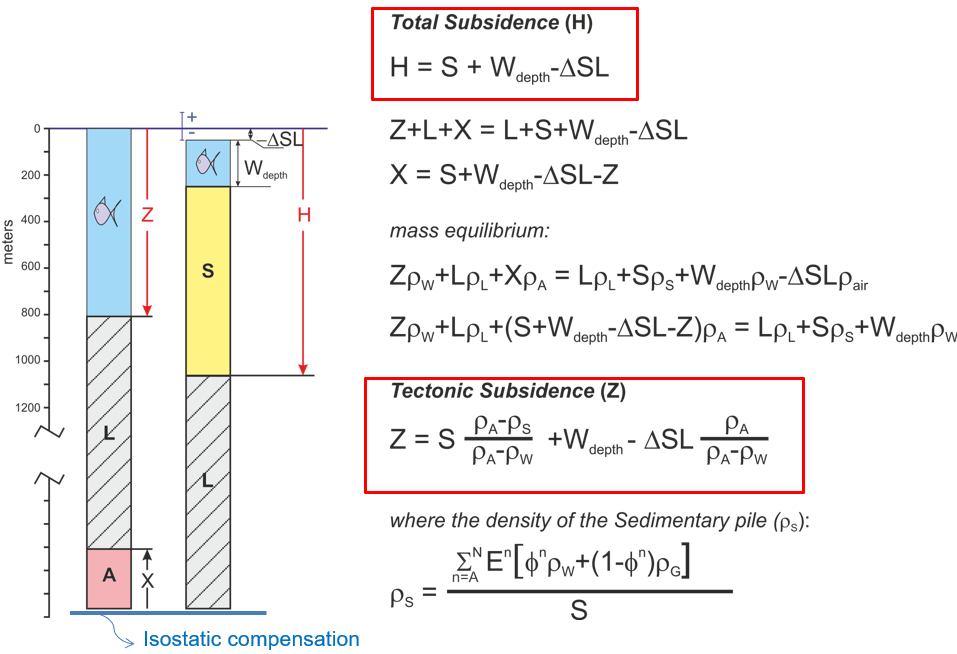

In [10]:
density_water = widgets.BoundedFloatText(
    value= 1000,
    max = 4000,
    step=50,
    description='density water:',
    disabled=False,
    style = style)
density_ast = widgets.BoundedFloatText(
    value= d_ast,
    max = 4000,
    step=50,
    description='density astenosphere:',
    disabled=False,
    style = style)
density_box = widgets.HBox([density_water,density_ast])
density_box

In [11]:
#TOTAL SUBSIDENCE

for n in range(len(subside_data)):
    subside_data.loc[n, 'AccumThick'] = subside_data['Thickness'][n:].sum()
    subside_data.loc[n,'DecompThick'] = round(subside_data['thick' + str(n)].sum())

subside_data['MinTotalSub'] = subside_data['DecompThick'] + subside_data['bat_min'] - subside_data['sealevel']
subside_data['MaxTotalSub'] = subside_data['DecompThick'] + subside_data['bat_max'] - subside_data['sealevel']


#TECTONIC SUBSIDENCE

d_w = density_water.value/1000
d_a = density_ast.value/1000
subside_data['d_sed'] = 0
for m in range(len(subside_data)-1):
    subside_data.loc[m,'d_sed'] = ((subside_data['thick' + str(m)]*
             (subside_data['p' + str(m)]*d_w + (1-subside_data['p' + str(m)])*subside_data['grain_density'])).sum()
             /subside_data['DecompThick'][m])


subside_data['TectSub'] = (subside_data['DecompThick']*                 # Tectonic subsidence without bathimetry correction
                           (d_a - subside_data['d_sed'])/(d_a - d_w)
                           - subside_data['sealevel']*d_a/(d_a - d_w))
subside_data['TectSubmin'] = subside_data['TectSub'] + subside_data['bat_min']  #Tectonic subsidence with bathimetry correction
subside_data['TectSubmax'] = subside_data['TectSub'] + subside_data['bat_max']
subside_data

,Unit,Age_Ma,Thickness,bat_min,bat_max,sealevel,porosity,grain_density,C-index,p0,thick0,p1,thick1,p2,thick2,p3,thick3,p4,thick4,p5,thick5,p6,thick6,p7,thick7,AccumThick,DecompThick,MinTotalSub,MaxTotalSub,d_sed,TectSub,TectSubmin,TectSubmax
0,Solsona,34.36,563.2,-100.0,0.0,0.0,0.500,2.719,0.000520,0.431892,563.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3225.7,3226.0,3126.0,3226.0,2.244172,1480.913848,1380.913848,1480.913848
1,Igualada-Tossa,36.81,1662.8,30.0,150.0,0.0,0.546,2.557,0.000583,0.242152,1662.8,0.318570,1849.271224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2662.5,2875.0,2905.0,3025.0,2.204921,1368.848714,1398.848714,1518.848714
2,Folgueroles,40.00,97.5,100.0,150.0,0.0,0.400,2.650,0.000300,0.202156,97.5,0.226275,100.539333,0.392392,128.026221,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,999.7,1360.0,1460.0,1510.0,2.104112,707.133900,807.133900,857.133900
3,Banyoles,41.50,218.0,50.0,100.0,0.0,0.580,2.500,0.000590,0.138083,218.0,0.171747,226.860549,0.483117,363.521495,0.517103,389.105849,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,902.2,1279.0,1329.0,1379.0,2.073672,681.944824,731.944824,781.944824
4,Tavertet,43.00,127.0,10.0,30.0,0.0,0.500,2.710,0.000700,0.08073,127.0,0.104136,130.318085,0.333365,175.129369,0.357328,181.659262,0.463343,217.545463,0.000000,0.000000,0.000000,0.000000,0.0,0.0,684.2,995.0,1005.0,1025.0,2.097351,520.276573,530.276573,550.276573
5,Penya,46.26,96.7,10.0,15.0,0.0,0.500,2.710,0.000700,0.07465,96.7,0.096105,98.995251,0.299830,127.799441,0.320218,131.632408,0.407275,150.966014,0.471245,169.230142,0.000000,0.000000,0.0,0.0,557.2,836.0,846.0,851.0,2.067021,448.161075,458.161075,463.161075
6,Cadí,49.00,460.5,0.0,30.0,0.0,0.500,2.710,0.000700,0.061424,460.5,0.078775,469.173673,0.235259,565.177705,0.249946,576.244744,0.310239,626.614704,0.351710,666.699588,0.390161,708.735624,0.0,0.0,460.5,709.0,709.0,739.0,2.042063,387.772890,387.772890,417.772890
7,basement,55.90,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000


## Plotting

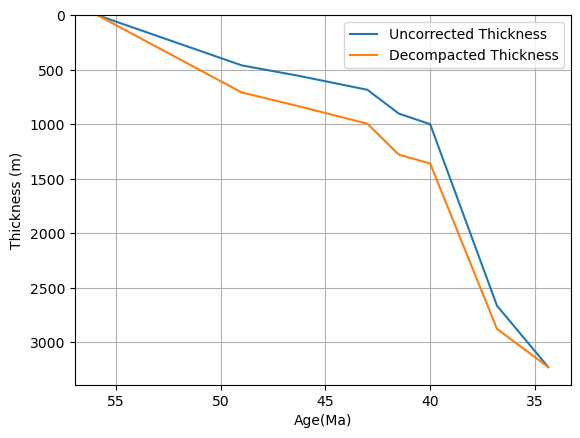

In [12]:
plt.plot(subside_data['Age_Ma'], subside_data['AccumThick'], label = 'Uncorrected Thickness' )
plt.plot(subside_data['Age_Ma'], subside_data['DecompThick'], label = 'Decompacted Thickness' )

plt.ylabel('Thickness (m)')
plt.xlabel('Age(Ma)')
plt.legend()
plt.grid()
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.ylim(top = 0)

plt.show()

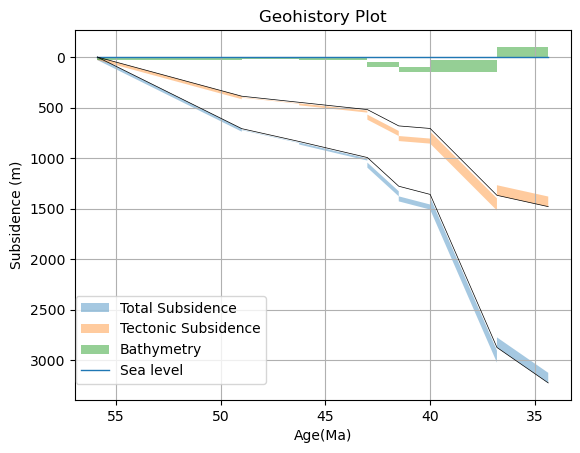

In [13]:
#PLOT TOTAL SUBSIDENCE

time = []
depth_min = []
depth_max = []

n = 0
time.append(subside_data['Age_Ma'][n])
depth_min.append(subside_data['DecompThick'][n] - subside_data['sealevel'][n] + subside_data['bat_min'][n])
depth_max.append(subside_data['DecompThick'][n] - subside_data['sealevel'][n] + subside_data['bat_max'][n])
for n in range(len(subside_data)-1):
    time.append(subside_data['Age_Ma'][n+1])
    depth_min.append(subside_data['DecompThick'][n+1] - subside_data['sealevel'][n+1] + subside_data['bat_min'][n])
    depth_max.append(subside_data['DecompThick'][n+1] - subside_data['sealevel'][n+1] + subside_data['bat_max'][n])
    time.append(subside_data['Age_Ma'][n+1])
    depth_min.append(subside_data['DecompThick'][n+1] - subside_data['sealevel'][n+1] + subside_data['bat_min'][n+1])
    depth_max.append(subside_data['DecompThick'][n+1] - subside_data['sealevel'][n+1] + subside_data['bat_max'][n+1])

plt.fill_between(time, depth_min, depth_max, alpha = 0.4, label = 'Total Subsidence')

#PLOT TECTONIC SUBSIDENCE

TectSub_min = []
TectSub_max = []

n = 0
TectSub_min.append(subside_data['TectSub'][n] + subside_data['bat_min'][n])
TectSub_max.append(subside_data['TectSub'][n] + subside_data['bat_max'][n])
for n in range(len(subside_data)-1):
    TectSub_min.append(subside_data['TectSub'][n+1] + subside_data['bat_min'][n])
    TectSub_max.append(subside_data['TectSub'][n+1] + subside_data['bat_max'][n])
    TectSub_min.append(subside_data['TectSub'][n+1] + subside_data['bat_min'][n+1])
    TectSub_max.append(subside_data['TectSub'][n+1] + subside_data['bat_max'][n+1])

plt.fill_between(time, TectSub_min, TectSub_max, alpha = 0.4, label = 'Tectonic Subsidence')


#PLOT BATHYMETRY

Bath_min = []
Bath_max = []

n = 0
Bath_min.append(subside_data['bat_min'][n])
Bath_max.append(subside_data['bat_max'][n])
for n in range(len(subside_data)-1):
    Bath_min.append(subside_data['bat_min'][n])
    Bath_max.append(subside_data['bat_max'][n])
    Bath_min.append(subside_data['bat_min'][n+1])
    Bath_max.append(subside_data['bat_max'][n+1])

plt.fill_between(time, Bath_max, Bath_min, alpha = 0.5, label = 'Bathymetry')

    
plt.plot(subside_data['Age_Ma'], - subside_data['sealevel'], linewidth = 1, label = 'Sea level')

plt.plot(subside_data['Age_Ma'], subside_data['DecompThick']- subside_data['sealevel'],
         color = 'black', linewidth = 0.5)
plt.plot(subside_data['Age_Ma'], subside_data['TectSub'],
         color = 'black', linewidth = 0.5)



plt.ylabel('Subsidence (m)')
plt.xlabel('Age(Ma)')
plt.legend(bbox_to_anchor=(0.4,0.3))
plt.title('Geohistory Plot')

plt.grid()
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

plt.show()

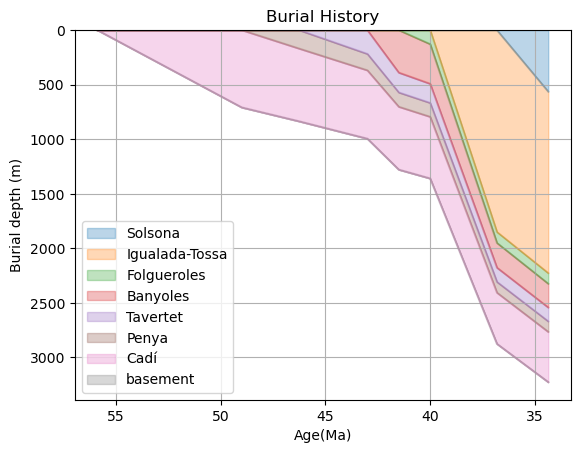

In [14]:
thickness_cols = subside_data.columns[pd.Series(subside_data.columns).str.startswith('thick')]
burial_hist = subside_data[thickness_cols].T
burial_hist.index = list(subside_data['Age_Ma'])
burial_hist.columns = list(subside_data['Unit'])
burial_hist.plot.area(alpha = 0.3)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.grid()
plt.ylabel('Burial depth (m)')
plt.xlabel('Age(Ma)')
plt.title('Burial History')
plt.show()

In [15]:
np.e

2.718281828459045